In [41]:
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Markdown, display, Image, display_html
import pandas as pd
import warnings
from sklearn.preprocessing import Normalizer, MinMaxScaler
warnings.filterwarnings('ignore')

In [70]:
# df = dvc_get_data('data/data.csv')
df = pd.read_csv('../data/data.csv')
ext_df = df.copy()
ext_df = df.drop(columns=["id"])
other_df = ext_df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)
ext_df  = ext_df.iloc[:, :9]
ext_df = ext_df.drop(columns=["diagnosis"])
ext_df = df[["perimeter_worst","radius_worst","perimeter_mean","concave points_mean","concavity_worst","compactness_se","texture_worst","concave points_worst","area_worst","compactness_se"]]
ext_df
# {'radius_mean': 0.01, 'texture_mean': 0.01, 'perimeter_mean': 0.05, 'area_mean': 0.01, 'smoothness_mean': 0.01, 'compactness_mean': 0.0, 'concavity_mean': 0.0, 'concave points_mean': 0.07, 'symmetry_mean': 0.0, 'fractal_dimension_mean': 0.01, 'radius_se': 0.0, 'texture_se': 0.0, 'perimeter_se': 0.0, 'area_se': 0.01, 'smoothness_se': 0.01, 'compactness_se': 0.02, 'concavity_se': 0.0, 'concave points_se': 0.0, 'symmetry_se': 0.0, 'fractal_dimension_se': 0.0, 'radius_worst': 0.49, 'texture_worst': 0.03, 'perimeter_worst': 0.16, 'area_worst': 0.02, 'smoothness_worst': 0.0, 'compactness_worst': 0.0, 'concavity_worst': 0.02, 'concave points_worst': 0.07, 'symmetry_worst': 0.0, 'fractal_dimension_worst': 0.0}

,perimeter_worst,radius_worst,perimeter_mean,concave points_mean,concavity_worst,compactness_se,texture_worst,concave points_worst,area_worst,compactness_se
0,184.60,25.380,122.80,0.14710,0.7119,0.04904,17.33,0.2654,2019.0,0.04904
1,158.80,24.990,132.90,0.07017,0.2416,0.01308,23.41,0.1860,1956.0,0.01308
2,152.50,23.570,130.00,0.12790,0.4504,0.04006,25.53,0.2430,1709.0,0.04006
3,98.87,14.910,77.58,0.10520,0.6869,0.07458,26.50,0.2575,567.7,0.07458
4,152.20,22.540,135.10,0.10430,0.4000,0.02461,16.67,0.1625,1575.0,0.02461
...,...,...,...,...,...,...,...,...,...,...
564,166.10,25.450,142.00,0.13890,0.4107,0.02891,26.40,0.2216,2027.0,0.02891
565,155.00,23.690,131.20,0.09791,0.3215,0.02423,38.25,0.1628,1731.0,0.02423
566,126.70,18.980,108.30,0.05302,0.3403,0.03731,34.12,0.1418,1124.0,0.03731
567,184.60,25.740,140.10,0.15200,0.9387,0.06158,39.42,0.2650,1821.0,0.06158


In [65]:
# ext_df = ext_df.rename(columns={"diagnosis":"d", "radius_mean": "r" , "texture_mean": "t" , "perimeter_mean":"p" , "area_mean": "a" , "smoothness_mean":"s" , "compactness_mean": "c" , "concavity_mean": "co" , "concave points_mean": "cp"})
# ext_df
minmax_scaler = MinMaxScaler()
scaled = pd.DataFrame(minmax_scaler.fit_transform(ext_df), columns=ext_df.columns.to_list())
scaled
normal = Normalizer()
normalized = pd.DataFrame(normal.fit_transform(scaled), columns=scaled.columns.to_list())
normalized.insert(loc=0, column='diagnosis', value=df['diagnosis'].map({'M': 1, 'B': 0}).astype(int))
normalized

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,1,0.316438,0.013761,0.331591,0.220903,0.360600,0.481022,0.427033,0.444022
1,1,0.543776,0.230460,0.520642,0.424092,0.245092,0.153684,0.172150,0.294873
2,1,0.411242,0.266821,0.407309,0.307266,0.351633,0.294686,0.316219,0.434618
3,1,0.143304,0.246130,0.159273,0.070193,0.553407,0.553434,0.385802,0.356648
4,1,0.463230,0.115149,0.464035,0.359829,0.316485,0.255844,0.341170,0.381230
...,...,...,...,...,...,...,...,...,...
564,1,0.427102,0.265430,0.420087,0.350651,0.326175,0.183255,0.353728,0.427324
565,1,0.445277,0.448616,0.432194,0.339166,0.291772,0.184397,0.241409,0.348189
566,1,0.424903,0.579824,0.416071,0.282911,0.268955,0.237385,0.202303,0.245952
567,1,0.333113,0.342904,0.343952,0.245851,0.304054,0.408376,0.425503,0.390428


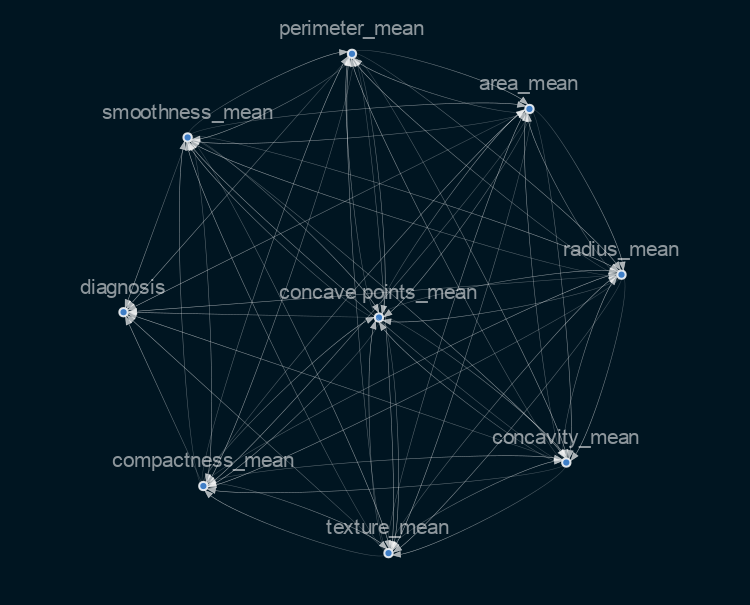

In [73]:
sm = from_pandas(normalized, tabu_parent_nodes=['diagnosis'],)
viz = plot_structure( sm, graph_attributes={"scale": "2.5",  "size": 2.5}, all_node_attributes=NODE_STYLE.WEAK,all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


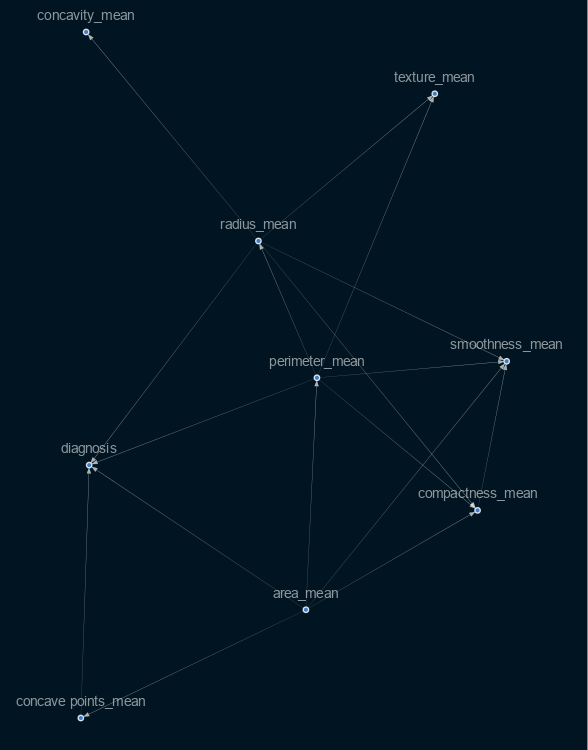

In [74]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure( sm, graph_attributes={"scale": "2.5",  "size": 2.5}, all_node_attributes=NODE_STYLE.WEAK,all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))